## Loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from datetime import datetime


In [2]:
affordability_data_clean = pd.read_csv('../../Datasets/02_clean_data_files/affordability_data_clean.csv')
london_df = pd.read_csv('../../Datasets/02_clean_data_files/landregistry_london_monthly_stats.csv')
outerlondon_df = pd.read_csv('../../Datasets/02_clean_data_files/landregistry_outer_london_monthly_stats.csv')
innerlondon_df = pd.read_csv('../../Datasets/02_clean_data_files/landregistry_inner_london_monthly_stats.csv')
cityoflondon_df = pd.read_csv('../../Datasets/02_clean_data_files/landregistry_city_of_london_monthly_stats.csv')
CPIH_clean = pd.read_csv('../../Datasets/02_clean_data_files/CPIH_clean.csv')
rates_data = pd.read_csv('../../Datasets/02_clean_data_files/interest_rates_clean_all_years.csv')
monthly_cpih = pd.read_csv('../../Datasets/02_clean_data_files/monthly_cpih.csv')

In [3]:
# Create function to reformat the dataframes previously created

def clean_lr_df(data):
    data.drop(columns=['URI', 'Region GSS code', 'Reporting period'], inplace=True)
    data.rename(columns={'Name': 'Region'}, inplace=True)
    data['Pivotable date'] = pd.to_datetime(data['Pivotable date'], format='%Y-%m-%d')
    data['Period'] = pd.to_datetime(data['Period'], format='%Y-%m')
    data.set_index(['Pivotable date'], inplace=True)

In [4]:
# Applying the function defined above to reformat the data

clean_lr_df(london_df)
clean_lr_df(innerlondon_df)
clean_lr_df(outerlondon_df)
clean_lr_df(cityoflondon_df)

## Visualisation

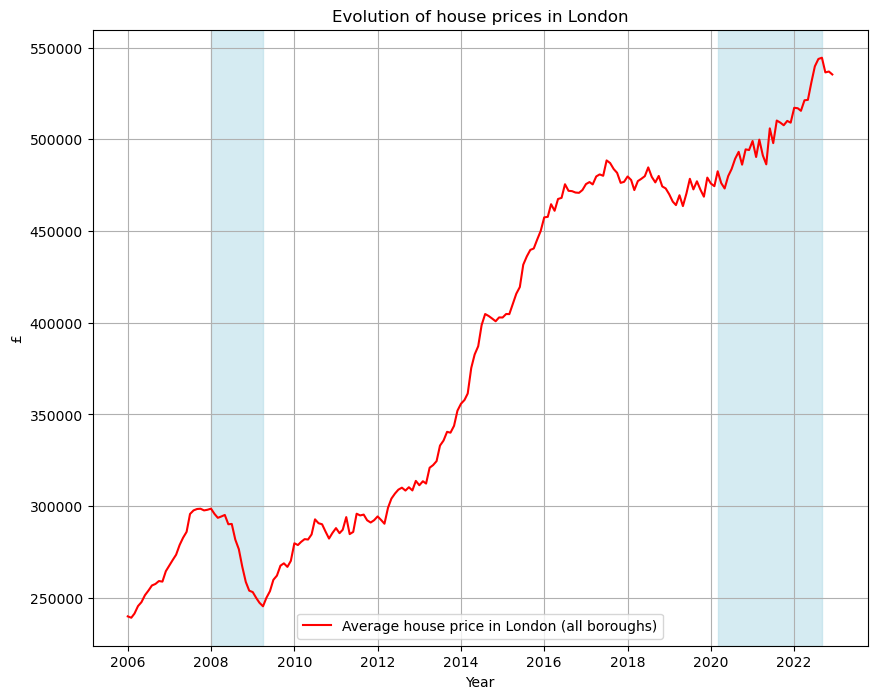

In [5]:

# Plot the average house price in London by year
plt.figure(figsize=(10, 8))
plt.title('Evolution of house prices in London')
x = london_df['Period']
y = london_df['Average price All property types']
plt.plot(x, y, label='Average house price in London (all boroughs)', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('£')
plt.grid(True)

plt.axvspan(datetime(2008, 1, 1), datetime(2009, 4, 1), color='lightblue', alpha=0.5)
plt.axvspan(datetime(2020, 3, 1), datetime(2022, 9, 1), color='lightblue', alpha=0.5)


plt.legend()


plt.show()


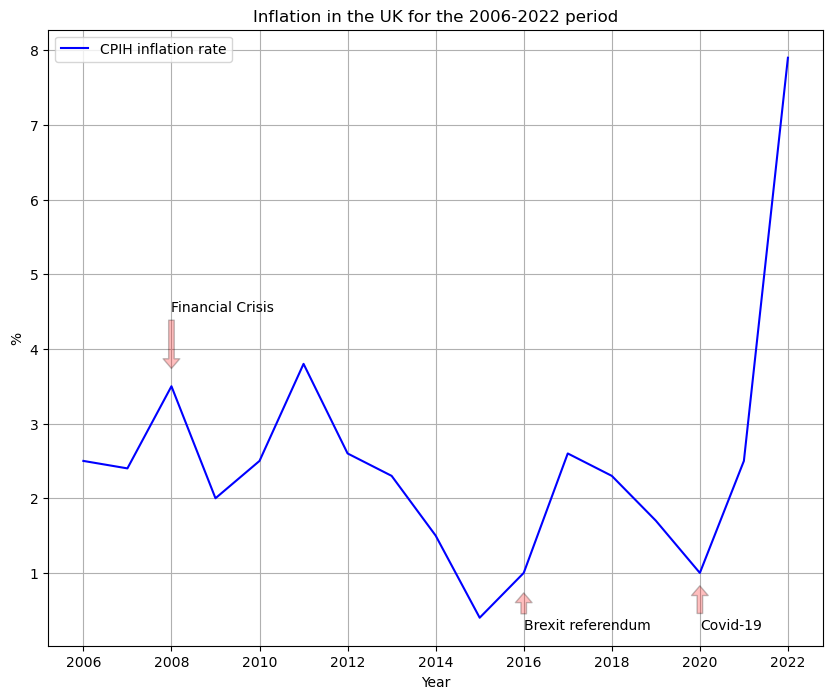

In [6]:
# Plot the CPIH inflation rate
plt.figure(figsize=(10, 8))
plt.plot((CPIH_clean['Year']), CPIH_clean['CPIH ANNUAL RATE (%)'], label='CPIH inflation rate', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('%')
plt.grid(True)
plt.title('Inflation in the UK for the 2006-2022 period')

# Add a label to the graph for Brexit
plt.annotate('Brexit referendum', xy =(2016, 0.75),
                xytext =(2016, 0.25),arrowprops = dict(facecolor ='red',
                shrink = 0.05, headlength = 7, alpha = 0.25), xycoords = 'data')
# Add a label to the graph for Covid
plt.annotate('Covid-19', xy =(2020, 0.85),
                xytext =(2020, 0.25),arrowprops = dict(facecolor ='red',
                shrink = 0.05, alpha = 0.25, headlength = 7), xycoords = 'data')

# Add a label to the graph for the 2008 crisis
plt.annotate('Financial Crisis', xy =(2008, 3.7),
                xytext =(2008, 4.5),arrowprops = dict(facecolor ='red',
                shrink = 0.05, alpha = 0.25, headlength = 7), xycoords = 'data')

plt.legend()
plt.show()

In [7]:
london_df_copy = london_df.copy()

# Convert the Period column to datetime
london_df_copy['Period'] = pd.to_datetime(london_df_copy['Period'])
# Slice the data so x and y are the same length
london_df_copy = london_df_copy.loc[london_df_copy['Period'] <= '2022-12-31']

# Calculate the correlation coefficient
correlation = scipy.stats.pearsonr(london_df_copy['Average price All property types'], monthly_cpih['CPIH Annual Rate'])[0]
print('The correlation between inflation and house prices changes in london is : {}'.format(correlation))

# We can see there is a weak correlation between inflation and house prices (0.074)


The correlation between inflation and house prices changes in london is : 0.07416457348078401


/var/folders/gj/tkh2rb516yldhdm4vjvbqmyh0000gp/T/ipykernel_2093/1022725325.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  london_df_resample = london_df_copy.resample('Y', on='Period').mean()


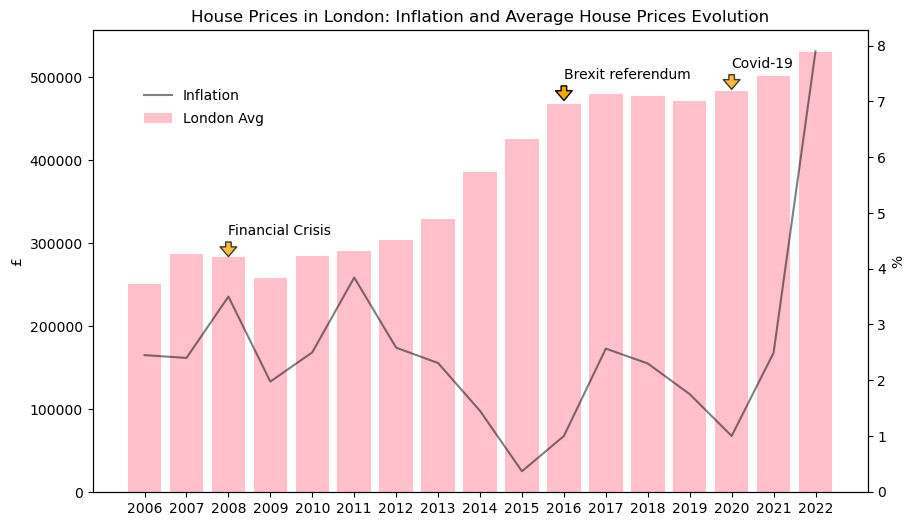

In [15]:

# Convert the Period column to datetime
london_df_copy['Period'] = pd.to_datetime(london_df_copy['Period'])
# Resample the house price data to yearly 
london_df_resample = london_df_copy.resample('Y', on='Period').mean()
london_df_resample = london_df_resample.reset_index()

# Convert the Date column to datetime
monthly_cpih['Date'] = pd.to_datetime(monthly_cpih['Date'])
# Resample the inflation data to yearly 
monthly_cpih_resample = monthly_cpih.resample('Y', on='Date').mean()
monthly_cpih_resample = monthly_cpih_resample.reset_index()

# Plot the data (avg price)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(london_df_resample['Period'].dt.year, london_df_resample['Average price All property types'], label='London Avg', color='pink')
ax1.set_ylabel('£')
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.85), frameon=False)
# inflation rate
ax2 = ax1.twinx()
ax2.plot(london_df_resample['Period'].dt.year, monthly_cpih_resample['CPIH Annual Rate'] , label='Inflation', color = 'black', alpha = 0.5)
ax2.set_ylabel('%')

# Add title and labels
plt.title('House Prices in London: Inflation and Average House Prices Evolution')
plt.xlabel('Year')
plt.xticks(range(2006, 2023), rotation=45)
# Add a label to the graph for Brexit
plt.annotate('Brexit referendum', xy =(2016, 7),
                xytext =(2016, 7.4),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, headlength = 7), xycoords = 'data')
# Add a label to the graph for Covid
plt.annotate('Covid-19', xy =(2020, 7.2),
                xytext =(2020, 7.6),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.75, headlength = 7), xycoords = 'data')

# Add a label to the graph for the 2008 crisis
plt.annotate('Financial Crisis', xy =(2008, 4.2),
                xytext =(2008, 4.6),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.75, headlength = 7), xycoords = 'data')
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.90), frameon=False)
# Show the plot
plt.show()



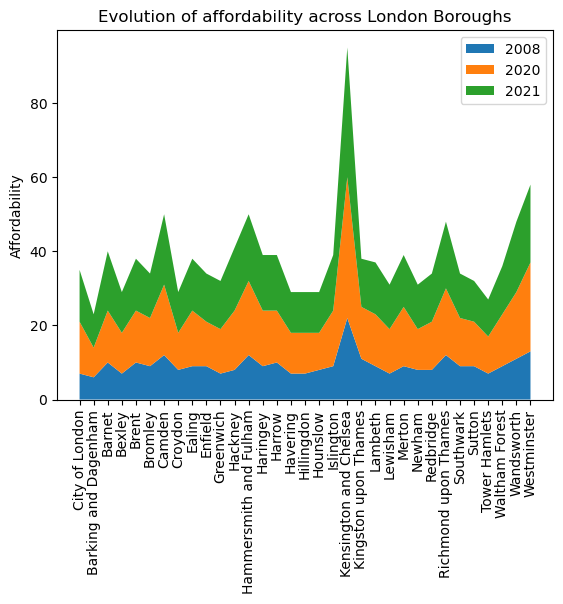

The most affordable boroughs are Barking and Dagenham, Bexley, and Bromley. The least affordable boroughs are Westminster, Kensington and Chelsea, and Hammersmith and Fulham.
We can see how affordability has evolved from 2008, adding more financial pressure onto household finances overtime


In [9]:
plt.title('Evolution of affordability across London Boroughs')
y1 = affordability_data_clean['2008']
y2 = affordability_data_clean['2016']
y3 = affordability_data_clean['2020']
x = affordability_data_clean['LA_name']
plt.stackplot(x,y1, y2, y3, labels = ['2008', '2020', '2021'])
plt.xticks(rotation=90)
plt.ylabel('Affordability')
plt.legend()
plt.show()


print('The most affordable boroughs are Barking and Dagenham, Bexley, and Bromley. The least affordable boroughs are Westminster, Kensington and Chelsea, and Hammersmith and Fulham.')

print('We can see how affordability has evolved from 2008, adding more financial pressure onto household finances overtime')

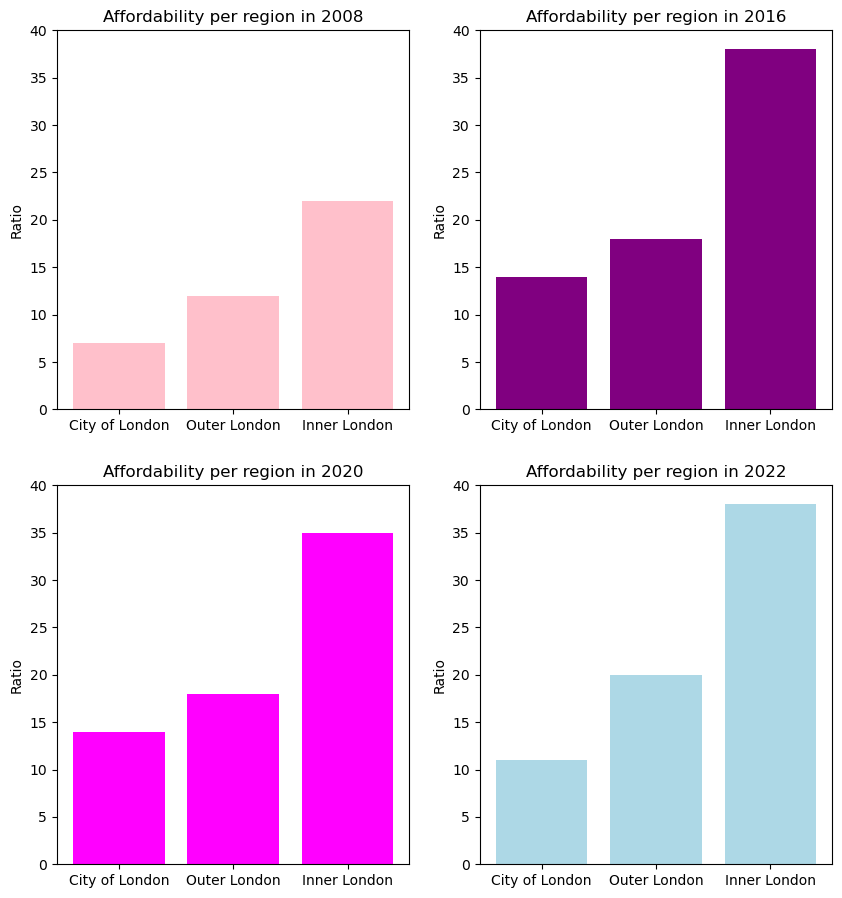

In [16]:
y1 = affordability_data_clean['2008']
y2 = affordability_data_clean['2016']
y3 = affordability_data_clean['2020']
y4 = affordability_data_clean['2022']
x = affordability_data_clean['Region']


# Create the figure

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Plot the affordability for 2008
axs[0, 0].bar(x, y1, color='pink')
axs[0, 0].set_ylim(0, 40)
axs[0, 0].set_ylabel('Ratio')
axs[0, 0].set_title('Affordability per region in 2008')
plt.subplots_adjust(top=1.5)

# Plot the affordability for 2016
axs[0, 1].bar(x, y2, color='purple')
axs[0, 1].set_ylim(0, 40)
axs[0, 1].set_ylabel('Ratio')
axs[0, 1].set_title('Affordability per region in 2016')
plt.subplots_adjust(top=1.5)

# Plot the affordability for 2020
axs[1, 0].bar(x, y3, color='fuchsia')
axs[1, 0].set_ylim(0, 40)
axs[1, 0].set_ylabel('Ratio')
axs[1, 0].set_title('Affordability per region in 2020')
plt.subplots_adjust(top=1.5)

# Plot the affordability for 2022
axs[1, 1].bar(x, y4, color='lightblue')
axs[1, 1].set_ylim(0, 40)
axs[1, 1].set_ylabel('Ratio')
axs[1, 1].set_title('Affordability per region in 2022')
plt.subplots_adjust(top=1.5)

# Show the plot
plt.show()

#Have used geeksforgeeks website to get an idea on how to create this. Find the link here: https://www.geeksforgeeks.org/matplotlib-pyplot-subplots-in-python/

We can see here how in some boroughs, especially the ones in inner london is more affordable now than it was in 2020. This matches up with our others graphs showing a decline in sales in Inner London


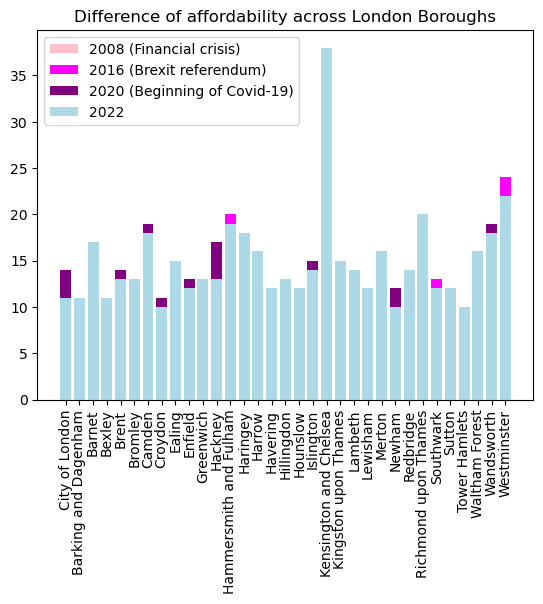

In [11]:
#  plot affordability
y1 = affordability_data_clean['2008']
y2 = affordability_data_clean['2016']
y3 = affordability_data_clean['2020']
y4 = affordability_data_clean['2022']
x = affordability_data_clean['LA_name']

plt.title('Difference of affordability across London Boroughs')
plt.bar(x,y1, label='2008 (Financial crisis)', color = 'pink')
plt.bar(x,y2, label='2016 (Brexit referendum)', color = 'fuchsia' )
plt.bar(x,y3, label='2020 (Beginning of Covid-19)', color = 'purple')
plt.bar(x,y4, label='2022', color = 'lightblue')

plt.legend()
plt.xticks(rotation=90)
plt.show
print('We can see here how in some boroughs, especially the ones in inner london is more affordable now than it was in 2020. This matches up with our others graphs showing a decline in sales in Inner London')

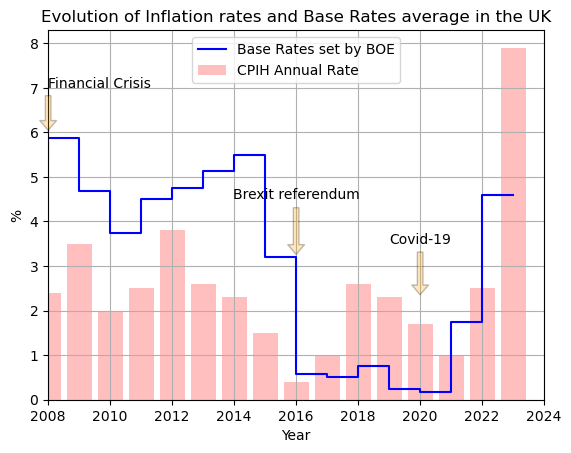

The rates of inflation have been increasing in recent years. This has an impact on their ability to save for a deposit or pay all the costs related to moving houses. 


In [14]:
plt.title('Evolution of Inflation rates and Base Rates average in the UK')
y1 = rates_data.groupby('Year')['Rates'].mean()
y2 = CPIH_clean['CPIH ANNUAL RATE (%)']
x = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
plt.xlim(2008, 2024)
plt.step(x,y1.tail(17), color = 'blue', label ='Base Rates set by BOE')
plt.bar(x,y2, color = 'red', alpha = 0.25 , label = 'CPIH Annual Rate')
plt.grid(True)
# Add a label to the graph for Brexit
plt.annotate('Brexit referendum', xy =(2016, 3.2), ha = 'center',
                xytext =(2016, 4.5),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.25, headlength = 7), xycoords = 'data')
# Add a label to the graph for Covid
plt.annotate('Covid-19', xy =(2020, 2.3), ha = 'center',
                xytext =(2020, 3.5),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.25, headlength = 7), xycoords = 'data')

# Add a label to the graph for the 2008 crisis
plt.annotate('Financial Crisis', xy =(2008, 6), ha = 'left',
                xytext =(2008, 7),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.25, headlength = 7), xycoords = 'data')


plt.xlabel('Year')
plt.ylabel('%')
plt.legend(loc = 'upper center')
plt.show()
print('The rates of inflation have been increasing in recent years. This has an impact on their ability to save for a deposit or pay all the costs related to moving houses. ')


In [13]:
# Double checking that the data is correct
rates_data.groupby('Year')['Rates'].mean()

Year
1694    6.000
1695    4.500
1699    3.750
1716    4.000
1719    5.000
        ...  
2018    0.750
2020    0.250
2021    0.175
2022    1.750
2023    4.600
Name: Rates, Length: 164, dtype: float64